# 🏘 Tehran House Price Prediction 

This notebook predicts house prices (USD) in Tehran using Linear Regression.  
It includes histograms, correlation analysis, proper evaluation, and organized cells.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Load the dataset

In [4]:
df = pd.read_csv("C:\\Users\\rezav\\iCloudDrive\\02-CodeProjects\\Python\\4-Machine Learning\\price.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


## Data Overview

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


## Clean Data

In [6]:
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df = df.dropna(subset=['Area', 'Address'])
df = df[df['Area'] < 1000]

## Visualize Histograms

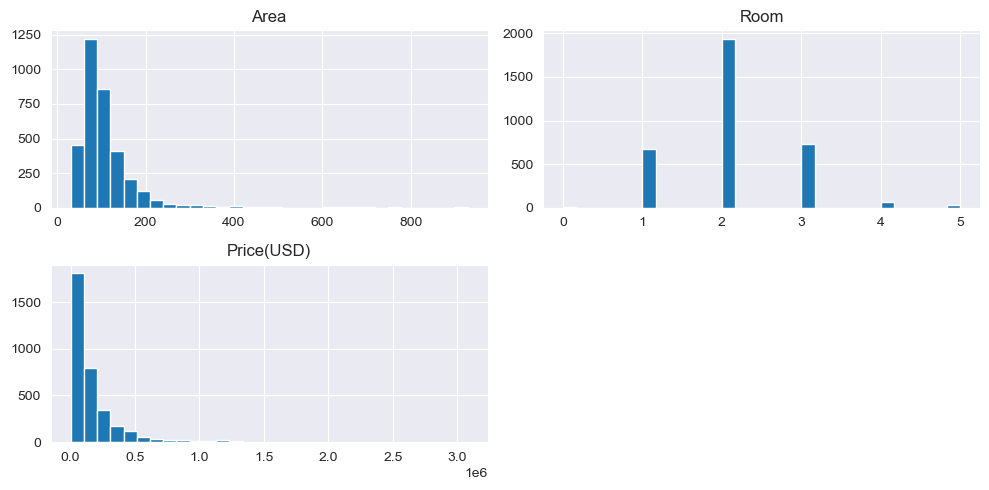

In [7]:
df[['Area', 'Room', 'Price(USD)']].hist(bins=30, figsize=(10,5))
plt.tight_layout()
plt.show()

## Correlation Matrix

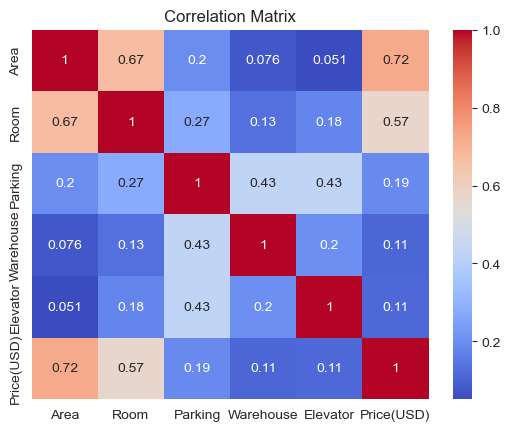

In [8]:
corr = df[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price(USD)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Select Features and Target

In [9]:
X = df[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']].copy()
y = df['Price(USD)']

X['Parking'] = X['Parking'].astype(int)
X['Warehouse'] = X['Warehouse'].astype(int)
X['Elevator'] = X['Elevator'].astype(int)

## Split Dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Train the Model

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predict on Test Set

In [12]:
y_pred = model.predict(X_test)

## Evaluate the Model

In [13]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R2 Score: 0.6236388567838165
Mean Squared Error: 27666266264.817673
Mean Absolute Error: 92015.14042023449


## Plot Actual vs Predicted

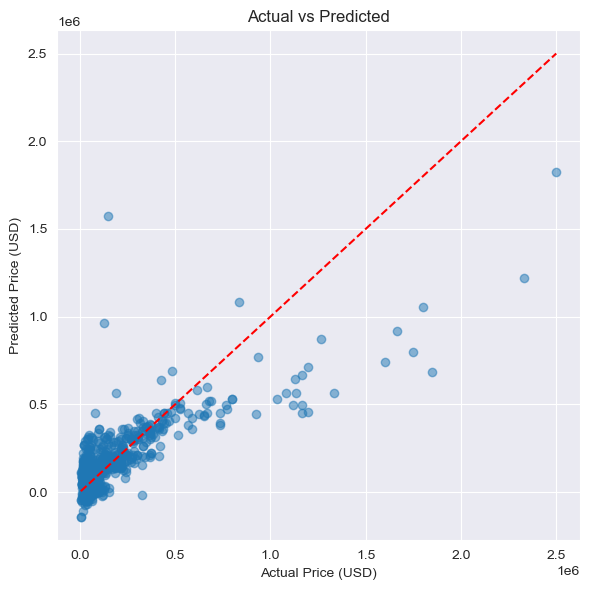

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()